In [1]:
import pandas as pd
df1 = pd.read_csv(r'C:\Users\Bclea\Downloads\TMDB_movie_dataset_v11.csv\TMDB_movie_dataset_v11.csv')

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

# Assuming df1 is your DataFrame with the given columns
# Step 1: Preprocessing
#df = df1.copy()
# Assuming df1 is your DataFrame with the given columns
# Step 1: Preprocessing
df = df1.copy()


# Remove rows with budget == 0
df = df[df['budget'] != 0]

company_counts = df['production_companies'].value_counts()

df = df[df['production_companies'].isin(company_counts[company_counts >= 20].index)]


df.reset_index(drop=True, inplace=True)

# Drop irrelevant columns
df = df.drop(columns=['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
                      'revenue', 'runtime', 'adult', 'backdrop_path', 'homepage',
                      'imdb_id', 'original_language', 'original_title', 'overview',
                      'popularity', 'poster_path', 'tagline', 'genres',
                      'production_countries', 'spoken_languages', 'keywords'])

# Fill missing values in 'production_companies' with the most frequent value (mode)
df['production_companies'].fillna(df['production_companies'].mode()[0], inplace=True)

print(df.tail())
# Split the 'production_companies' strings into lists of companies
#df['production_companies'] = df['production_companies'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Step 2: One-hot encode categorical columns (production companies)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categories = encoder.fit_transform(df[['production_companies']])

# Step 3: Use the one-hot encoded data as the feature set (X)
X = encoded_categories

# Define the target variable (Budget)
y = df['budget']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Custom RandomForestRegressor with Manual Progress
n_estimators = 100
step_size = 10  # Fit the model in batches of 10 trees

# Enable warm_start to allow partial fits
regressor = RandomForestRegressor(n_estimators=step_size, warm_start=True, random_state=42, n_jobs=-1)

pbar = tqdm(total=n_estimators, desc="Training Random Forest Trees")

# Fit the trees in larger increments for faster performance
for i in range(step_size, n_estimators + 1, step_size):
    regressor.n_estimators = i
    regressor.fit(X_train, y_train)
    pbar.update(step_size)  # Update progress bar after each batch of trees

pbar.close()

# Step 6: Make predictions
y_pred = regressor.predict(X_test)

# Step 7: Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


      budget production_companies
1495      15    EBS Entertainment
1496       2    EBS Entertainment
1497   23000                 Ecam
1498  175010    Republic Pictures
1499   29000                 Ecam


Training Random Forest Trees: 100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Mean Squared Error: 129432552613262.45
R² Score: 0.70


In [6]:
df.tail()

,budget,production_companies
9977,100000,Ascension Films
9978,500,Academia Internacional de Cinema
9979,1200,FilmArche
9980,30000,Digital Dream Studios
9981,400,Academia Internacional de Cinema


C:\Users\Bclea\AppData\Local\Temp\ipykernel_18988\3241416464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='production_companies', data=df, palette='Set2')


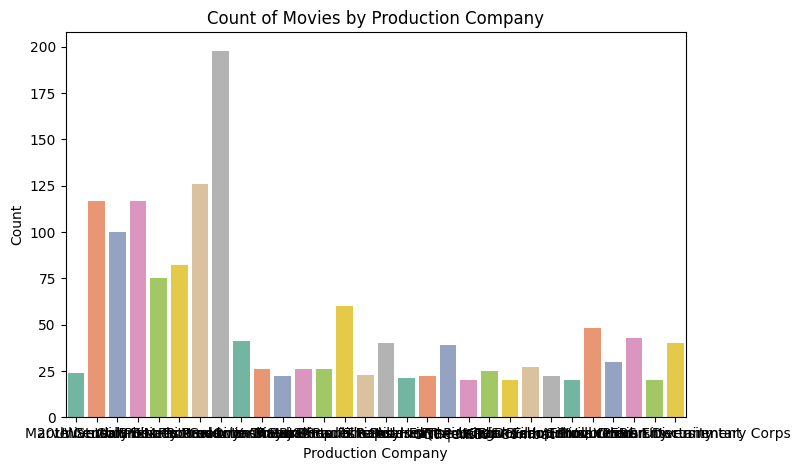

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='production_companies', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.title('Count of Movies by Production Company')

# Show the plot
plt.show()


In [14]:
# Step 9: Show predictions alongside actual labels
print("Predicted values vs Actual values:")
for i in range(len(y_test)):
    print(f"Prediction: {y_pred[i]:} \t Actual: {y_test.iloc[i]:}")

Predicted values vs Actual values:
Prediction: 228102.2907134283 	 Actual: 400000
Prediction: 21474.489906963547 	 Actual: 22000
Prediction: 16594443.62540096 	 Actual: 8000000
Prediction: 19743808.67308781 	 Actual: 23000000
Prediction: 7736368.885870956 	 Actual: 3716946
Prediction: 618660.0787133637 	 Actual: 500000
Prediction: 3645117.371120027 	 Actual: 795000
Prediction: 6574195.629516771 	 Actual: 375000
Prediction: 21474.489906963547 	 Actual: 22000
Prediction: 6574195.629516771 	 Actual: 25485000
Prediction: 6574195.629516771 	 Actual: 2000000
Prediction: 228102.2907134283 	 Actual: 100000
Prediction: 7736368.885870956 	 Actual: 1516000
Prediction: 26824.42761015157 	 Actual: 25000
Prediction: 7736368.885870956 	 Actual: 1400000
Prediction: 3079.4037979047594 	 Actual: 1200
Prediction: 54.44100085692094 	 Actual: 8
Prediction: 1067669.5927041317 	 Actual: 991000
Prediction: 5011554.032505175 	 Actual: 4000000
Prediction: 12993542.623692734 	 Actual: 12000000
Prediction: 7685.4

In [16]:
# Example of new data (replace this with your actual new data)
new_data = pd.DataFrame({
    'production_companies': ['Metro-Goldwyn-Mayer', 'Chance Allen Productions']
})

# Step 1: Preprocess the new data
# Fill missing values in 'production_companies' in new_data (if applicable)
new_data['production_companies'].fillna(df['production_companies'].mode()[0], inplace=True)

# Step 2: One-hot encode the new data using the same encoder
new_data_encoded = encoder.transform(new_data[['production_companies']])

# Step 3: Predict with the trained model using the new data
new_predictions = regressor.predict(new_data_encoded)

# Display predictions
print("Predictions for new data:", new_predictions)


Predictions for new data: [3.64511737e+06 2.72599620e+03]
